<h1><center> Testing Distributions 

<div class="alert alert-success">
Sometimes it may be useful (or necessary) to formally test whether some data you observe follows a particular distribution. Perhaps most commonly, if you are using statistical tests that assume data to have a particular distribution, you need to test whether this is indeed the case. 
</div>

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest

Here, we will focus on the most common case: testing whether a dataset is normally distributed. 

In [2]:
# Create a dataset of normally distributed data
d1 = stats.norm.rvs(size=100000)

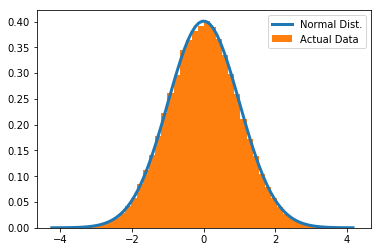

In [3]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, normed=True, label='Actual Data');
plt.legend();

In [4]:
# In scipy, the 'normaltest' function tests whether a sample differs from a normal distribution
#  The null hypothesis is that the data are normally distributed.
#    We can use normaltest to check this null - do we have to reject the null (to claim the data are not normal).
#  It does using a combined statistics comparing the skew and kurtosis of the observed
#    data, as compared to as expected under a normal distribution. 
normaltest?

In [5]:
# Run normal test on the data
stat, p = normaltest(d1)

In [6]:
# Check the p-value of the normaltest
print('\nNormaltest p value is: ', p, '\n')

# With alpha value of 0.05, how should we proceed
if p < 0.05:
    print('We have evidence to reject the null hypothesis, that the data are normally distributed.')
else:
    print('We do not have evidence to reject the null hypothesis.')


Normaltest p value is:  0.349586082684 

We do not have evidence to reject the null hypothesis.


Any number of datasets may not follow a normal distribution, which may be obvious from plotting the data. More important is checking data when it looks pretty normal, but might in fact come from another (similar) distribution. For example, under some paramters, the Beta distributed data can look quite normal. 

In [7]:
# Generate some data from a beta distribution
d2 = stats.beta.rvs(7, 10, size=100000)

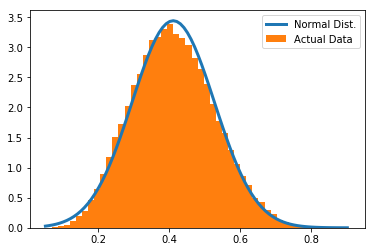

In [8]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, normed=True, label='Actual Data');
plt.legend();

# Note that we can see *some* differences, when plotting the PDF
#  However, if you turn off the PDF plot, we might guess these data look pretty normal

In [9]:
# Run normal test on the data
stat, p = normaltest(d2)

In [10]:
# Check the p-value of the normaltest
print('\nNormaltest p value is: ', p, '\n')

# With alpha value of 0.05, how should we proceed
if p < 0.05:
    print('We have evidence to reject the null hypothesis, that the data are normally distributed.')
else:
    print('We do not have evidence to reject the null hypothesis.')


Normaltest p value is:  2.16009217283e-166 

We have evidence to reject the null hypothesis, that the data are normally distributed.


In this example, the plot is ambiguous, but 'normaltest' suggests these data are very unlikely to come from a normal distribution. Using this data in statistical tests that expect normally distributed inputs may provide invalid outputs, since we have violated the assumptions upon which these tests are based. 

### Testing other distributions

More generally, you can use the Kolmogorov-Smirnov test to check if a set of data has some other distribution (that you specificy). 

This test is implemented in scipy, and you can explore using it. 

In [11]:
from scipy.stats import kstest

In [12]:
kstest?